### Grading Rubric
#### Q1: 
1pt if homework is done in a group
#### Q2 (5pt):
- 1pt for creating data correctly
- 1pt for plotting data and decision boundary
- 1pt for experiments with varying C and gamma
- 1pt for reporting number of support vectors and test accuracy
- 1pt for analysis

#### Q3 (1pt):
- 0.5pt for implenting linear SVM
- 0.5pt for result

#### Q4 (2pt): 
- 0.5pt for creating plot with + and - data
- 0.5pt for reasonable decision boundary
- 0.5pt for correct support vectors
- 0.5pt for correct margins. 

### Q2

In [29]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
# create data
pos_train = np.random.multivariate_normal(mean=(1,1), 
    cov=[[1,0], [0,1]], size=1000)
neg_train = np.random.multivariate_normal(mean=(-1,-1), 
    cov=[[3,0], [0,3]], size=1000)
pos_test = np.random.multivariate_normal(mean=(1,1), 
    cov=[[1,0], [0,1]], size=1000)
neg_test = np.random.multivariate_normal(mean=(-1,-1), 
    cov=[[3,0], [0,3]], size=1000)

In [27]:
# combine and shuffle data
X_train = np.concatenate([pos_train, neg_train], axis=0)
y_train = np.concatenate([np.ones(1000), np.zeros(1000)], axis=0)
random_idx_train = np.random.permutation(np.arange(2000))
X_train, y_train = X_train[random_idx_train], y_train[random_idx_train]

X_test = np.concatenate([pos_test, neg_test], axis=0)
y_test = np.concatenate([np.ones(1000), np.zeros(1000)], axis=0)
random_idx_test = np.random.permutation(np.arange(2000))
X_test, y_test = X_test[random_idx_test], y_test[random_idx_test]

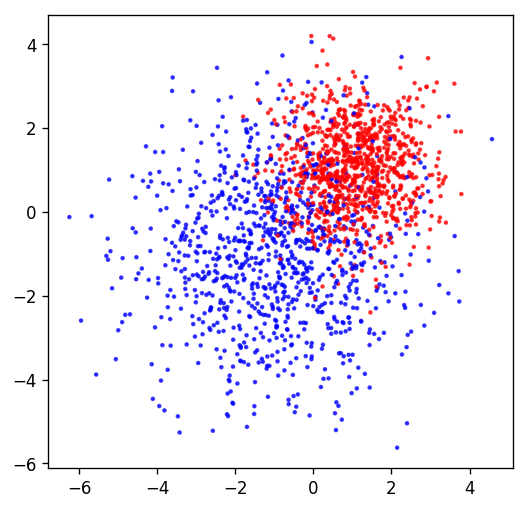

In [62]:
# plot training data
plt.figure(dpi=120, figsize=(5,5))
color_map = {1:"red", 0:"blue"}
plt.scatter(X_train[:, 0], X_train[:, 1], s=3, alpha=0.7,
            color=[color_map[i] for i in y_train])
plt.show()

### Q2(a) SVM with rbf kernel

In [69]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd

In [182]:
def make_plot(X, y, clf, C, gamma):
    plt.figure(dpi=150, figsize=(6,5))
    positive_support = list(set(clf.support_).intersection(np.arange(2000)[y==1]))
    negative_support = list(set(clf.support_).intersection(np.arange(2000)[y==0]))
    positive = np.arange(2000)[y==1]
    negative = np.arange(2000)[y==0]
    plt.scatter(X[positive_support, 0], X[positive_support, 1], 
                s=6, alpha=1, c="red", edgecolor="red", 
                label="+ support")
    plt.scatter(X[negative_support, 0], X[negative_support, 1], 
                s=6, alpha=1, c="blue", edgecolor="blue", 
                label="- support")    
    
    plt.scatter(X[positive, 0], X[positive, 1], c="red", 
                s=6, alpha=0.2, 
                label="+ data")
    plt.scatter(X[negative, 0], X[negative, 1], c="blue", 
                s=6, alpha=0.2, 
                label="- data")

    x_min, x_max, y_min, y_max = -7, 5, -7, 5
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)
    
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired, alpha=0.1)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-.5, 0, .5], label="decision boundary", alpha=0.7)
    
    plt.legend(loc="best")
    plt.title("C={} gamma={}".format(C, gamma))
    plt.show()

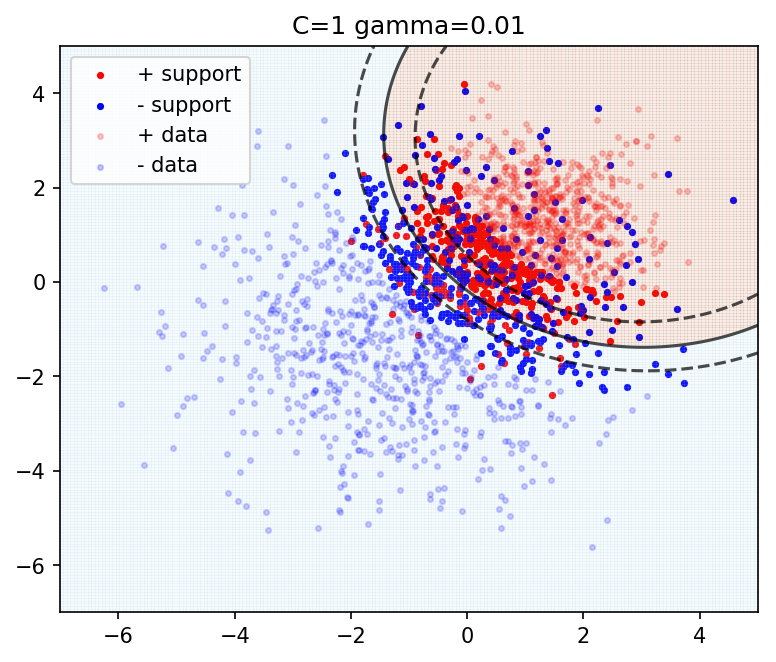

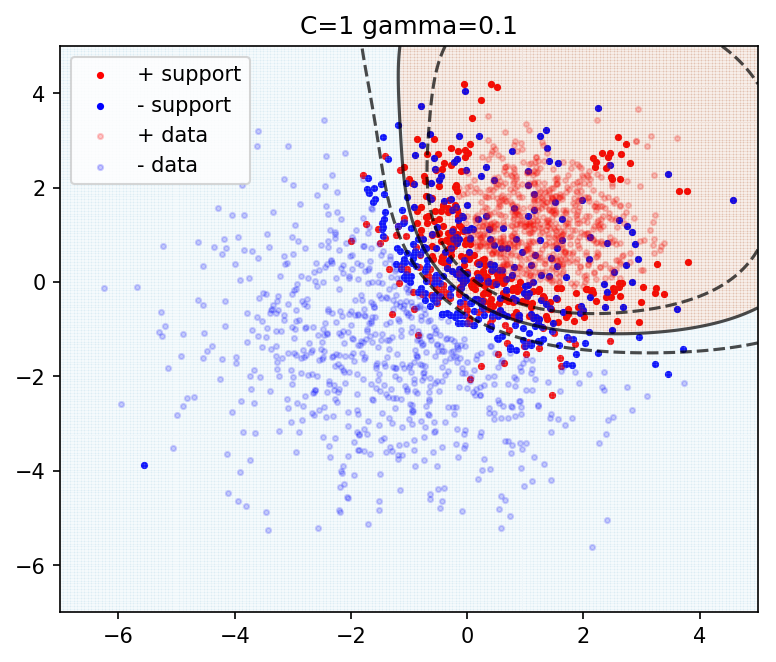

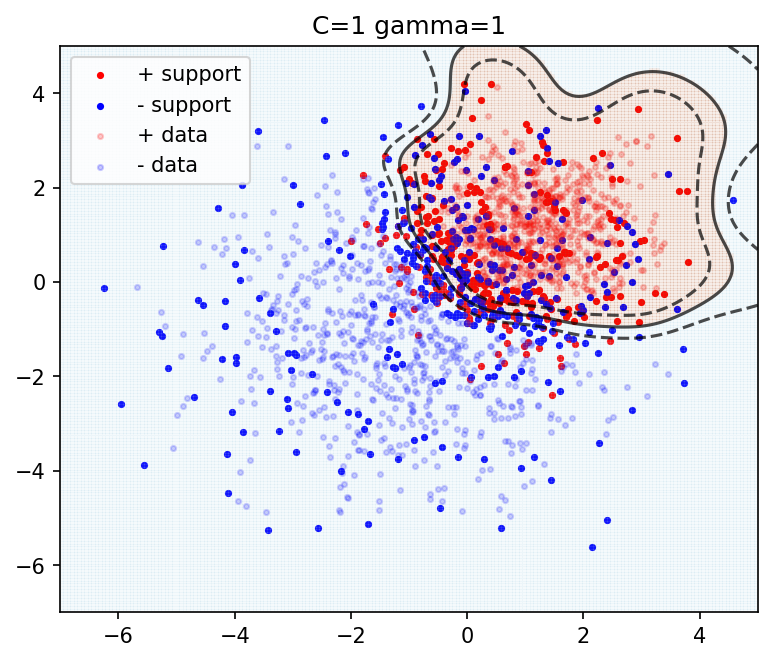

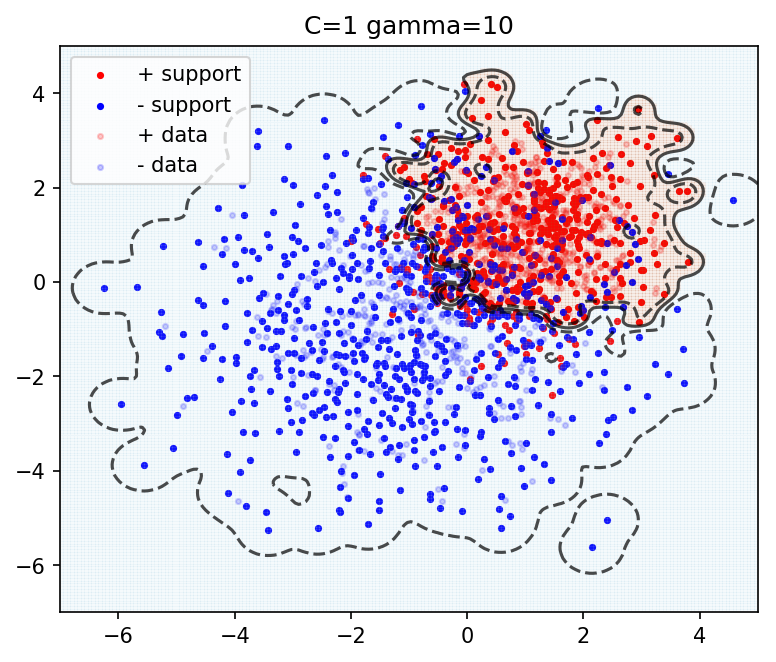

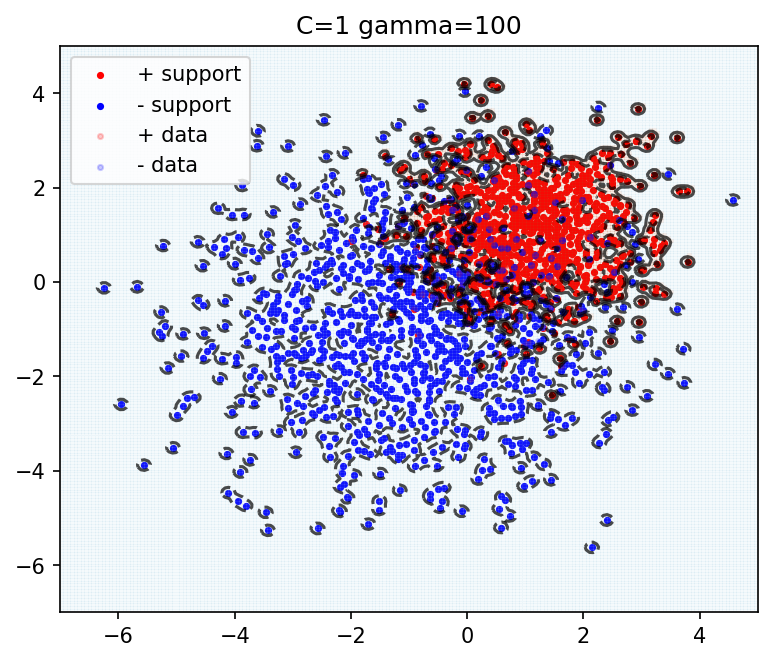

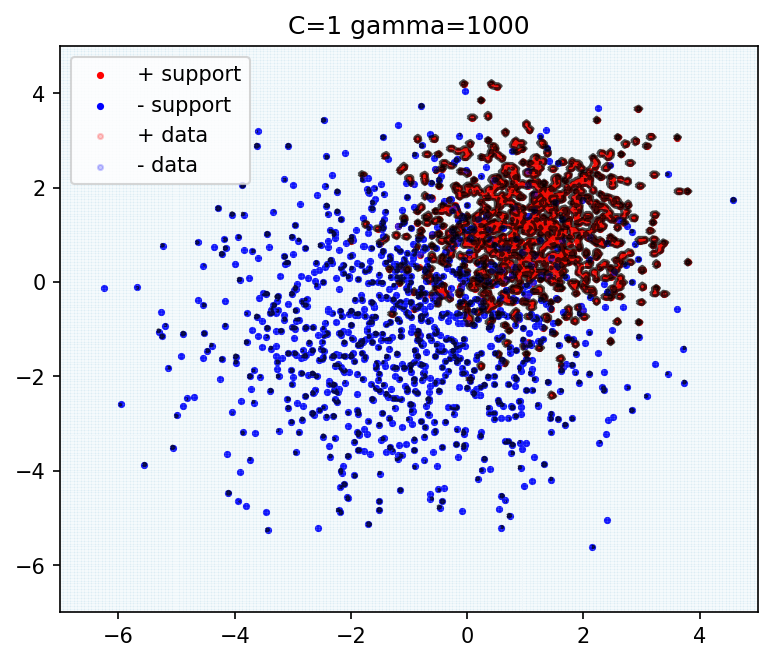

In [183]:
C = 1
gamma_range = [0.01,0.1,1,10,100,1000]
result_df = pd.DataFrame(columns=["num support vectors", "test accuracy"])
for gamma in gamma_range:
    svm = SVC(C=1, gamma=gamma)
    svm.fit(X_train, y_train)
    make_plot(X_train, y_train, svm, C, gamma)
    test_accuracy = accuracy_score(svm.predict(X_test), y_test)
    result_df.loc[gamma, "num support vectors"] = svm.support_vectors_.shape[0]
    result_df.loc[gamma, "test accuracy"] = test_accuracy
result_df.index.name="gamma"

In [84]:
result_df

num support vectors test accuracy
gamma                                    
0.01                    750        0.8795
0.10                    615         0.885
1.00                    667        0.8875
10.00                  1187         0.875
100.00                 1757        0.8235
1000.00                1987        0.6755

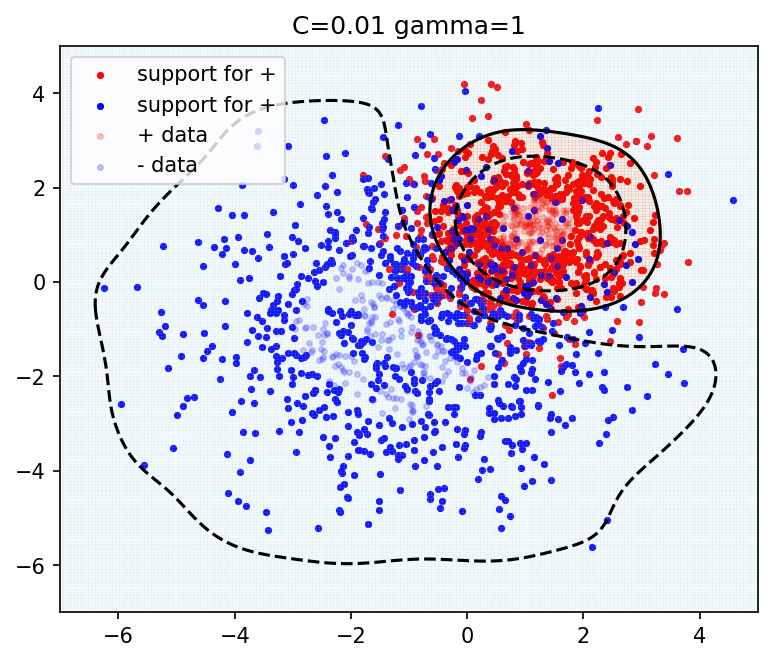

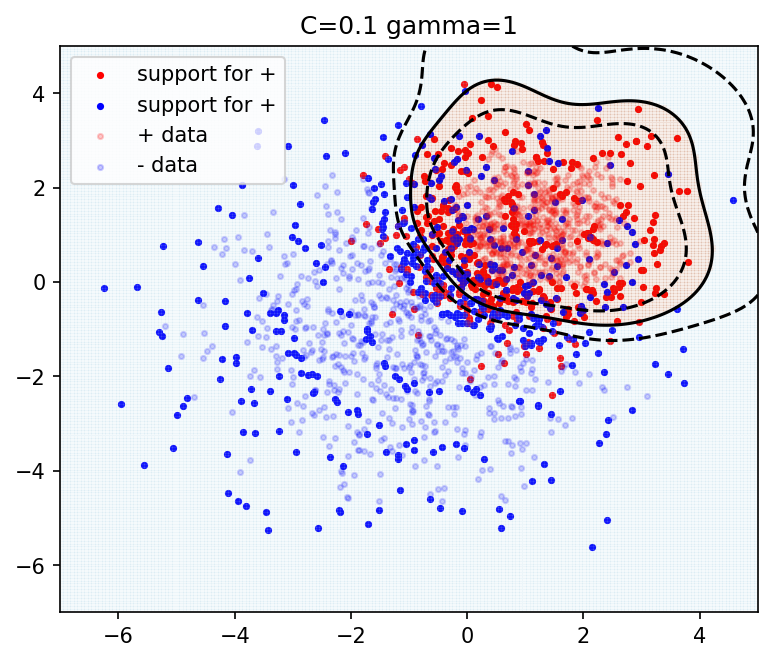

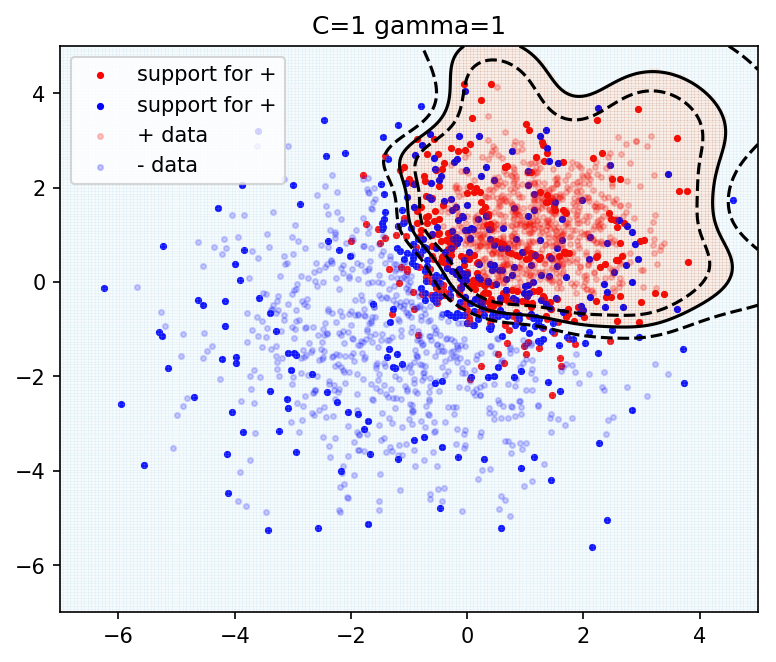

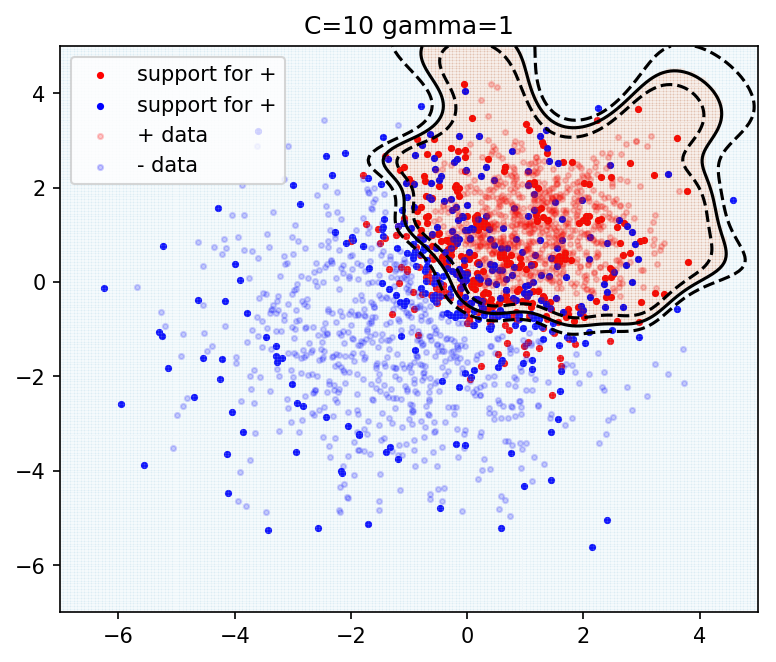

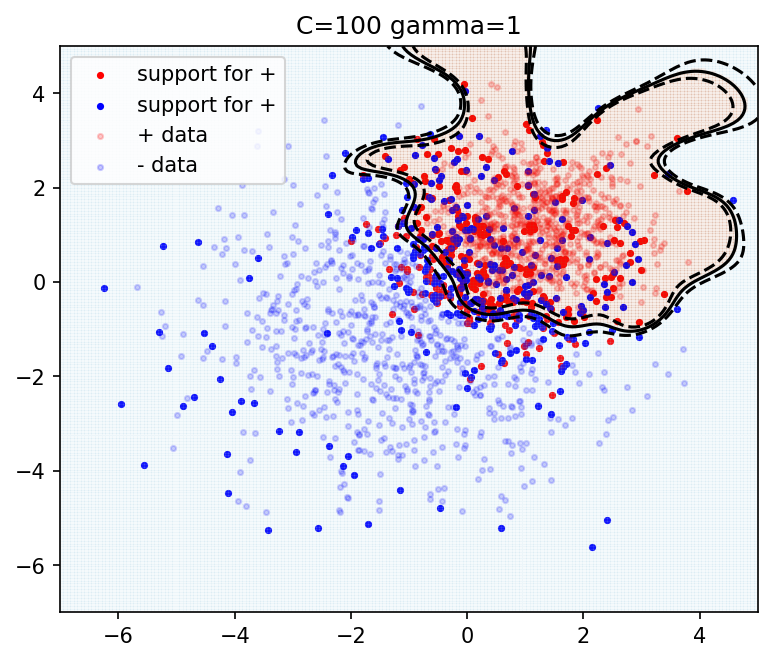

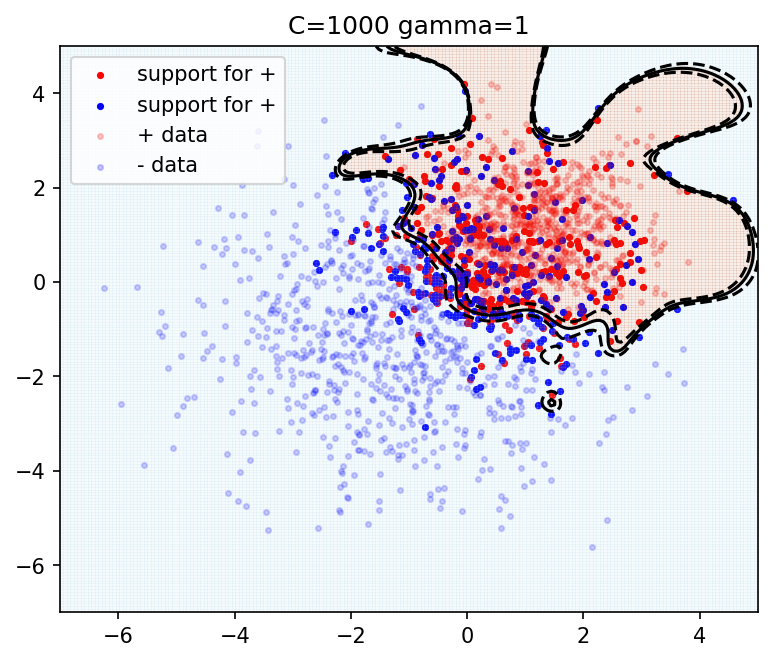

In [176]:
gamma = 1
C_range = [0.01,0.1,1,10,100,1000]
result_df = pd.DataFrame(columns=["num support vectors", "test accuracy"])
for C in C_range:
    svm = SVC(C=C, gamma=1)
    svm.fit(X_train, y_train)
    make_plot(X_train, y_train, svm, C, gamma)
    test_accuracy = accuracy_score(svm.predict(X_test), y_test)
    result_df.loc[C, "num support vectors"] = svm.support_vectors_.shape[0]
    result_df.loc[C, "test accuracy"] = test_accuracy
result_df.index.name="C"

In [177]:
result_df

num support vectors test accuracy
C                                        
0.01                   1628         0.867
0.10                    838         0.887
1.00                    667        0.8875
10.00                   641        0.8825
100.00                  615         0.876
1000.00                 598        0.8755

### comments
- when C is fixed, with increasing the gamma, the number of support vectors increases and the accuracy on the validation set decreases.
- from the figures, we see as gamma increases, the decision boundary shrinks on each support vectors. This is because the variance of the Gaussian kernal is getting smaller with increasing the gamma, which causes the Gaussian kernal to be sharply peaked at the support vectors and overt the training data.
- when gamma is fixed, with incresing the C, the number of support vectors decreases. The margin decrases, however the accuracy doesn't change much.
- from the figures we see that the decision boundary doesn't change much as the C increases, which explains why the accuracy on test data doesn't change much. C adjusts the penalty of slack term, the bigger C is the more penalty is to have misclassified or inseperable data, and bigger C leads to smaller margin. Hence the number of support vectors decreases as the C grows.

### Q3: svm with linear kernel

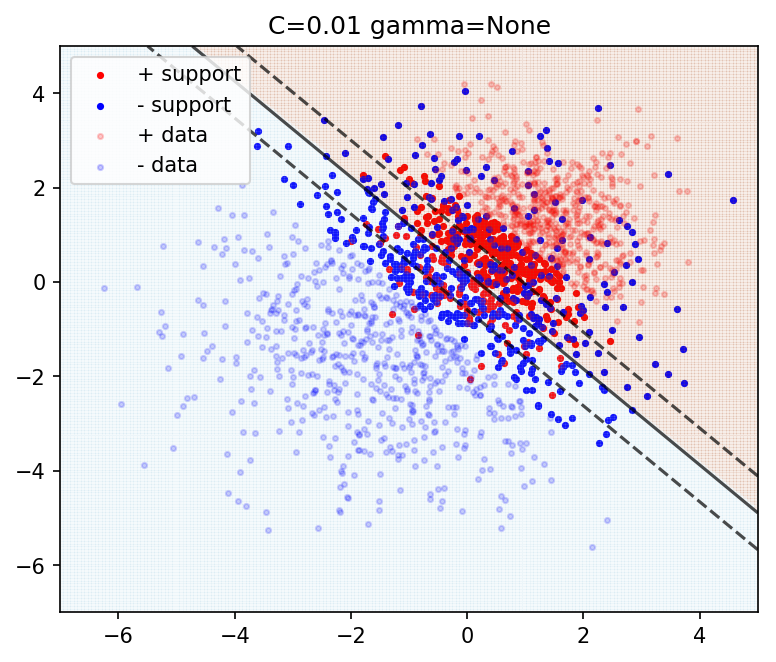

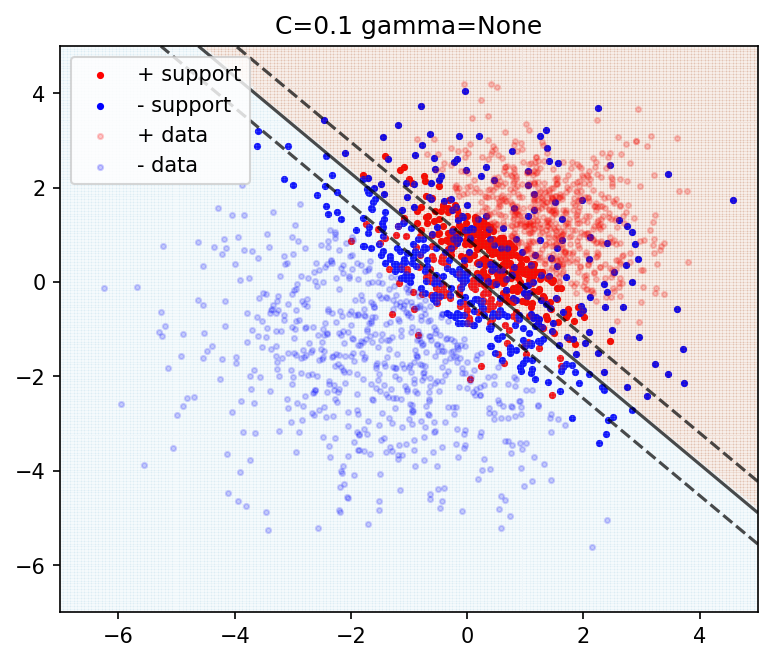

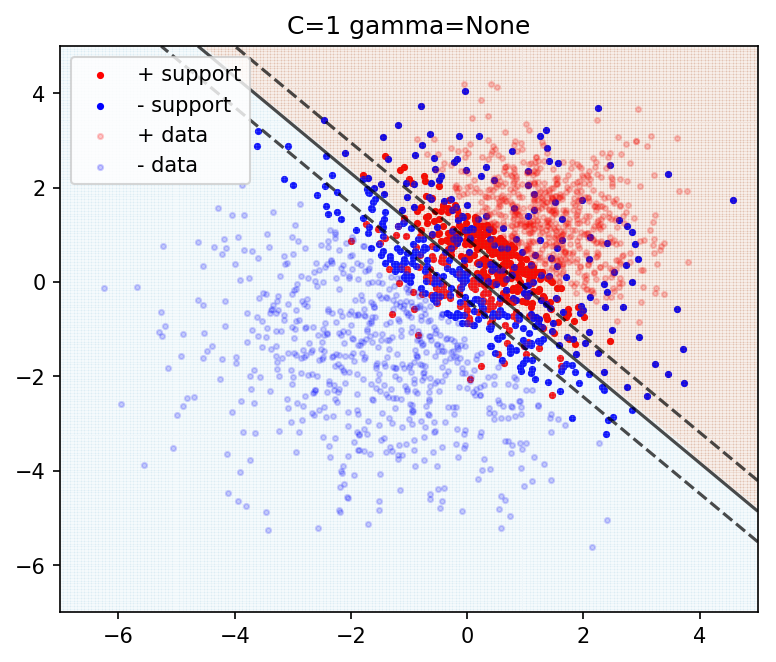

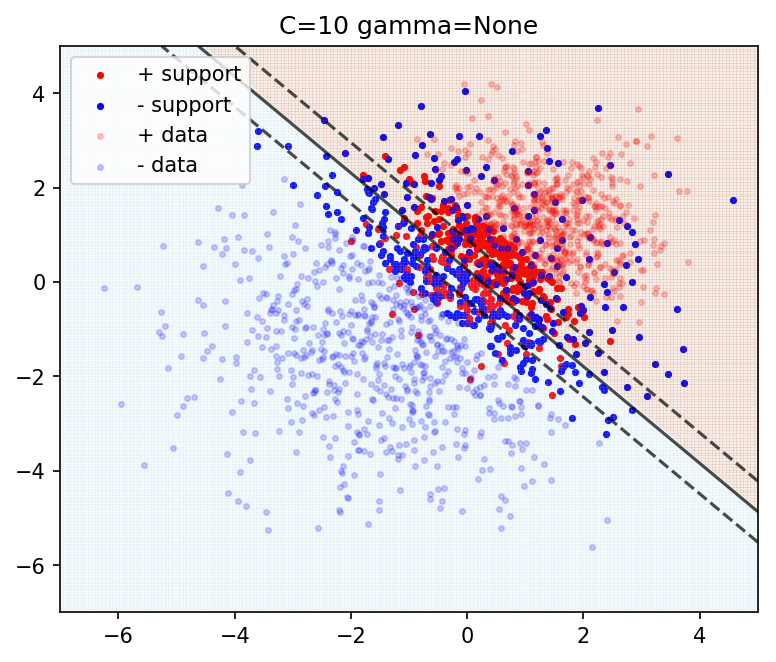

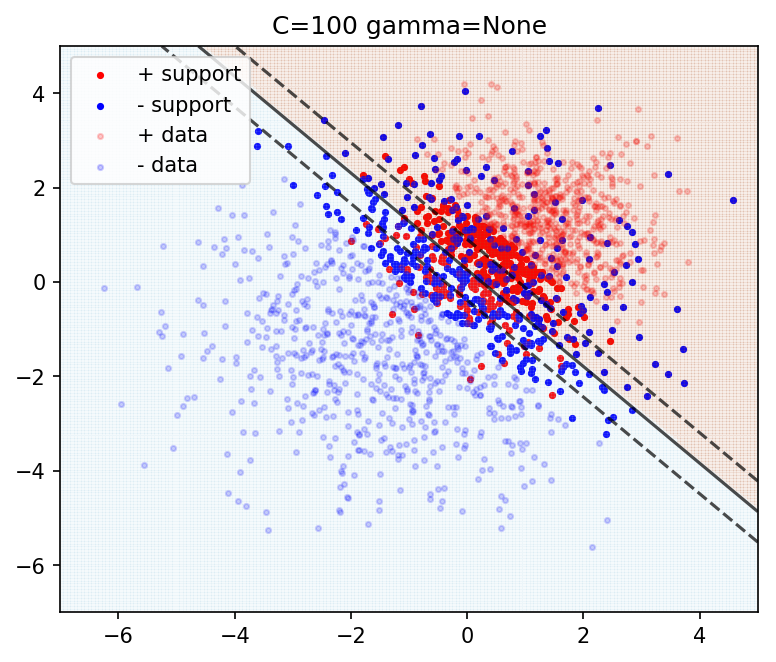

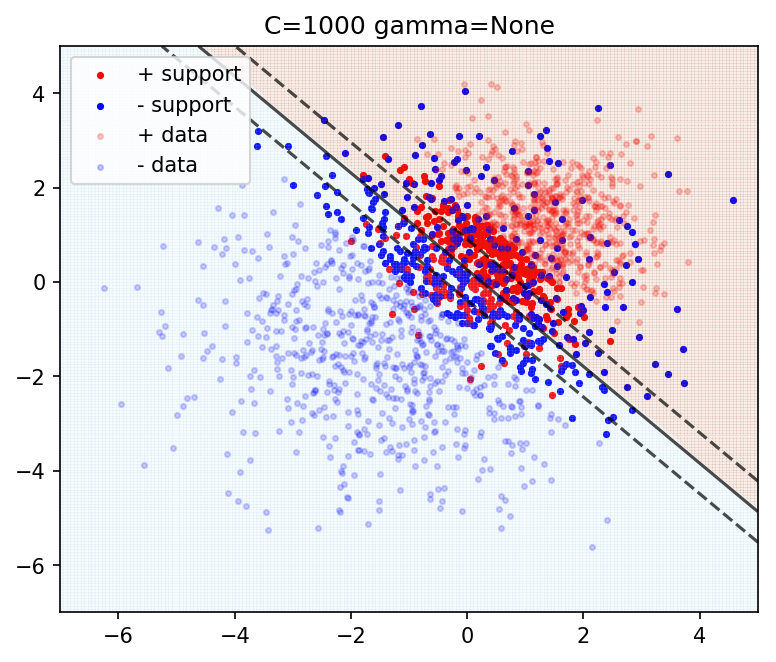

In [185]:
C_range = [0.01,0.1,1,10,100,1000]
result_df = pd.DataFrame(columns=["num support vectors", "test accuracy"])
for C in C_range:
    svm = SVC(kernel="linear", C=C)
    svm.fit(X_train, y_train)
    make_plot(X_train, y_train, svm, C, "None")
    test_accuracy = accuracy_score(svm.predict(X_test), y_test)
    result_df.loc[C, "num support vectors"] = svm.support_vectors_.shape[0]
    result_df.loc[C, "test accuracy"] = test_accuracy
result_df.index.name="C"

In [186]:
result_df

num support vectors test accuracy
C                                        
0.01                    818        0.8665
0.10                    739        0.8665
1.00                    728         0.867
10.00                   726         0.867
100.00                  726         0.867
1000.00                 727        0.8665

### Q4. svm by hand

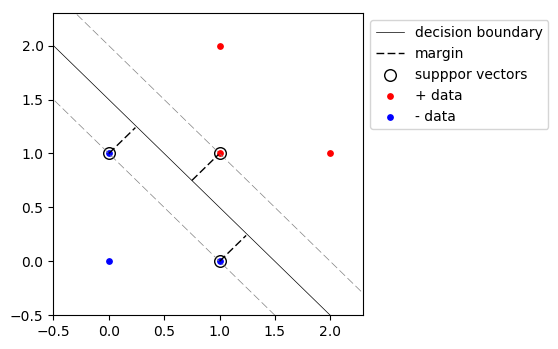

In [250]:
plt.figure(dpi=100, figsize=(4,4))
plt.scatter([0,1,1], [1,0,1], s=70, marker="o", c="white",
            edgecolor="black", label="supppor vectors")
plt.scatter([1,1,2], [1,2,1], s=15, c="red", label="+ data")
plt.scatter([0,1,0], [0,0,1], s=15, c="blue", label="- data")
plt.xlim(-0.5, 2.3)
plt.ylim(-0.5, 2.3)
# decision boundary y = -x + 1.5
# margin line 1: y = -x + 2
# margin line 2: y = -x + 1
xrange = np.arange(-1, 3, 0.01)
y1 = -xrange + 1.5
y2 = -xrange + 2
y3 = -xrange + 1
plt.plot(xrange, y1, "-", linewidth=0.5, color="black", label="decision boundary")
plt.plot(xrange, y2, "--", linewidth=0.5, color="grey")
plt.plot(xrange, y3, "--", linewidth=0.5, color="grey")
plt.plot(np.arange(0, 0.25, 0.01), np.arange(1, 1.25, 0.01) , "--", 
         linewidth=1, color="black", label="margin")
plt.plot(np.arange(1, 1.25, 0.01), np.arange(0, 0.25, 0.01) , "--", 
         linewidth=1, color="black")
plt.plot(np.arange(0.75, 1, 0.01), np.arange(0.75, 1, 0.01) , "--", 
         linewidth=1, color="black")

plt.legend(loc="best", bbox_to_anchor=(1,1))
plt.show()